In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

import os
os.chdir("/content/drive/MyDrive/dataset")

dato = pd.read_csv("nafld1.csv",on_bad_lines='skip')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Media de peso:
86.41339754816111
Desviación estándar de Peso:
22.25999408384336
Valor máximo de Peso:
181.7
Valor mínimo de Peso:
33.4
--------------------------
Altura normalizada: 163.0
Media de Altura después de la normalización: 169.27527463779654
Desviación estándar de Altura después de la normalización: 10.125304031453116
Valor máximo de Altura después de la normalización: 207.0
Valor mínimo de Altura después de la normalización: 123.0


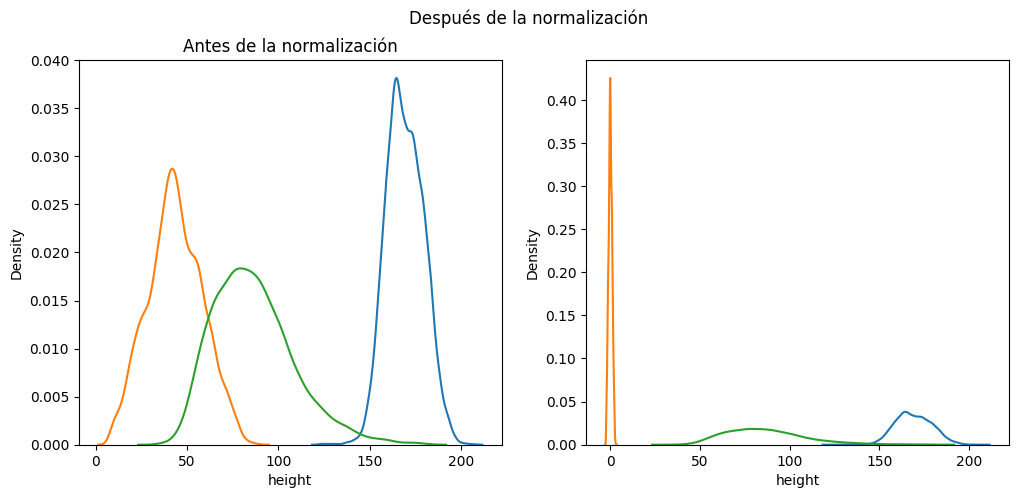

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import gridspec
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dato = pd.read_csv("nafld1.csv", on_bad_lines='skip', sep=',')

# Eliminar filas con datos faltantes
dato.dropna(inplace=True)

# Agregar una nueva columna para definir en valores más simples los años
dato['age2'] = dato.groupby('age')['age'].transform(lambda x: x - 10)

# Crear un nuevo DataFrame llamado df a partir de dato
df = pd.DataFrame(dato)

# Cálculos de Peso
print("Media de peso:")
print(df['weight'].mean())

print("Desviación estándar de Peso:")
print(df['weight'].std())

print("Valor máximo de Peso:")
print(df['weight'].max())

print("Valor mínimo de Peso:")
print(df['weight'].min())

# Gráfico antes de la normalización
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("Antes de la normalización")
sns.kdeplot(df['height'], ax=ax1)
sns.kdeplot(df['age2'], ax=ax1)
sns.kdeplot(df['weight'], ax=ax1)

# Normalización de las columnas age2, Altura y Peso
scaler = preprocessing.StandardScaler()
df[['age2', 'Alturas', 'id']] = scaler.fit_transform(df[['age2', 'height', 'weight']])

# Cálculos de la columna Altura después de la normalización
print("--------------------------")
print("Altura normalizada:", df['height'].iloc[0])
print("Media de Altura después de la normalización:", df['height'].mean())
print("Desviación estándar de Altura después de la normalización:", df['height'].std())
print("Valor máximo de Altura después de la normalización:", df['height'].max())
print("Valor mínimo de Altura después de la normalización:", df['height'].min())

# Gráfico después de la normalización
fig.suptitle("Después de la normalización")
sns.kdeplot(df['height'], ax=ax2)
sns.kdeplot(df['age2'], ax=ax2)
sns.kdeplot(df['weight'], ax=ax2)

plt.show()